In [3]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")
# pd.set_option("precision", 2)

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics/"
geo_model = gp.create_model("BES_model_seismic_v6")

Active grids: ['regular']


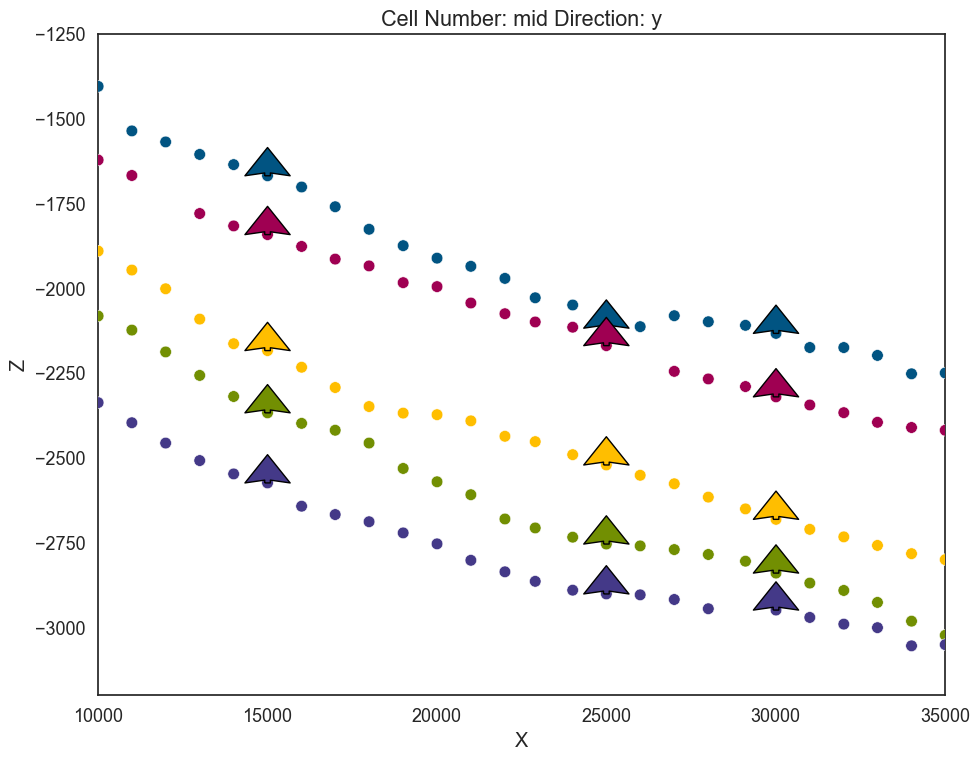

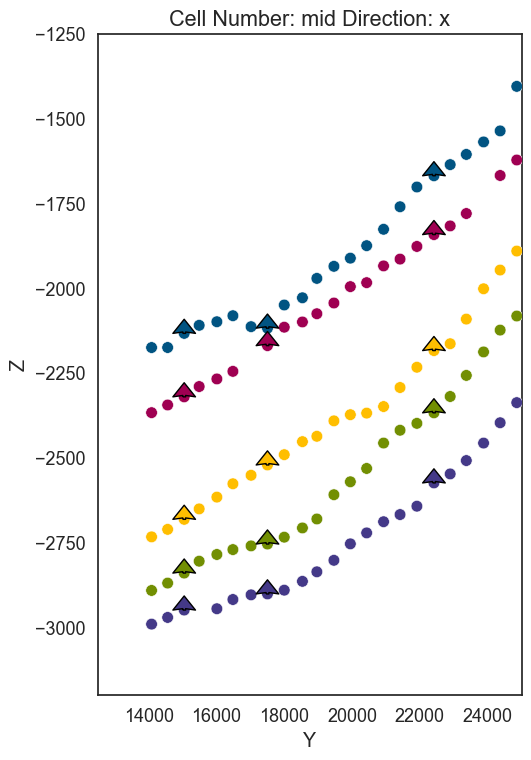

In [4]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[10000, 35000, 12500, 25000, -3200, -1250],
    resolution=[100, 100, 100],
    path_i=data_path + "surface_points.csv",
    path_o=data_path + "orientations_points.csv",
)

# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "sf": ("sea_floor"),
        "Strat_1": ("h1"),
        "Strat_2": ("h2"),
        "Strat_3": ("h3"),
        "Strat_4": ("h4"),
        "Basement": ("basement",),
    },
)

# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=False
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

In [5]:
# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="basic",
    image=False,
    show_data=True,
    show_surfaces=True,
    show_scalar=True,
    show_boundaries=True,
    ve=10,
)

In [5]:
# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_run",  # fast_compile, fast_run
    dtype="float64",  # for model stability
)

sol = gp.compute_model(geo_model, compute_mesh=True)

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                              values
range                  28018.788339
$C_o$               18691726.190476
drift equations  [3, 3, 3, 3, 3, 3]


ValueError: Must have equal len keys and value when setting with an iterable

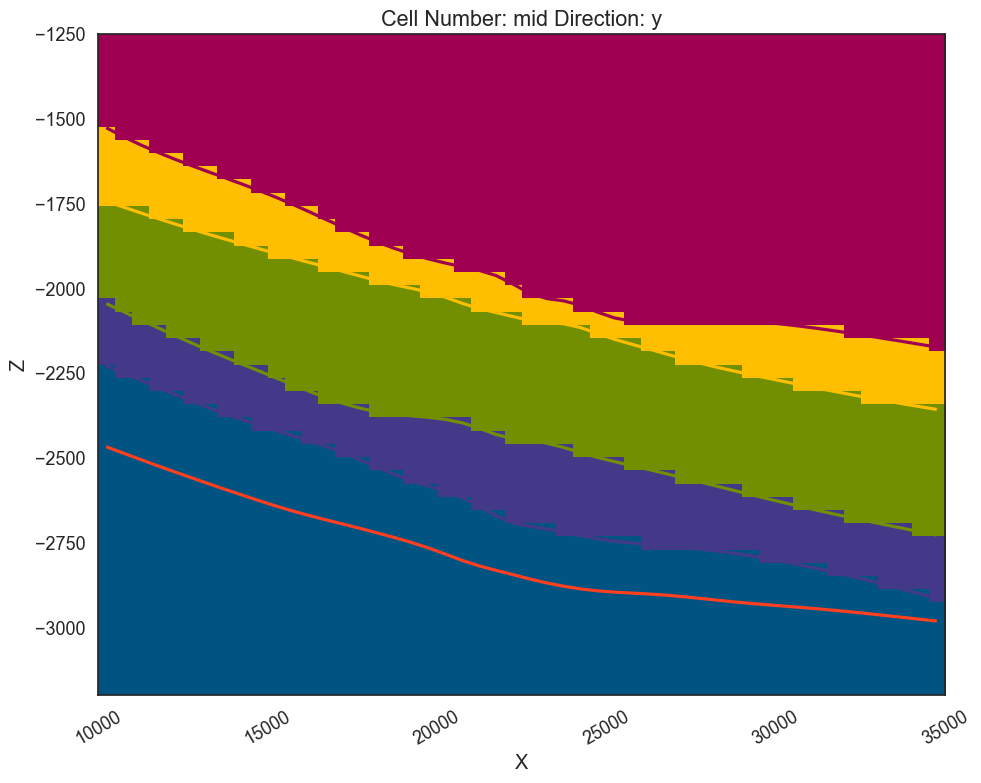

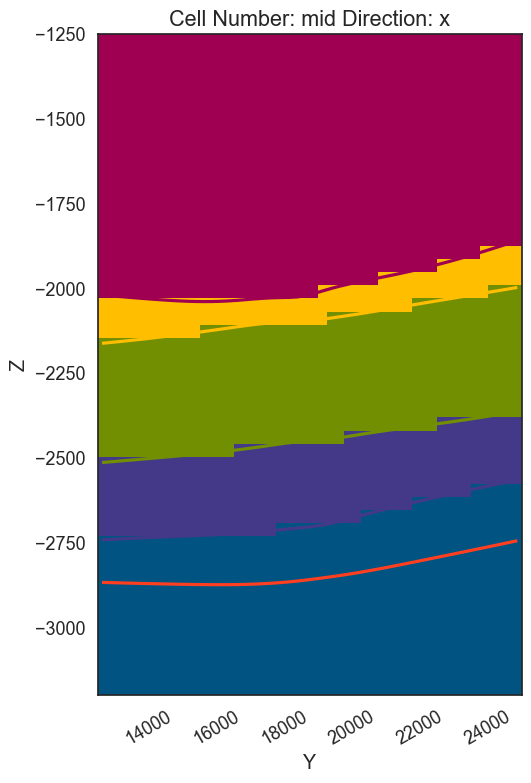

In [6]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

In [ ]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type="basic", show_data=False, ve=5)